# Relaxation of wind shear

This notebook shows a comparison of three different model outputs. All runs are at 1 km grid spacing on a 20 x 20 point grid, the RCEMIP initial profile, sea surface, idealised radiation and temperature and specific humidity relaxed to RCEMIP profiles in the stratosphere. The three runs are:
    
- **No shear**, the 1 km RCE setup, winds relaxed to zero with 4-day relaxation time everywhere (**and misconfigured halo/periodical wind relaxation**).
- **Forced shear**, moderate initial unidirectional wind shear with 3-hour wind relaxation at all levels to maintin the same shear environment.
- **Initial shear**, moderate initial unidirectional wind shear and no wind relaxation anywhere.
    
Questions we would like to answer with these runs:

- How does high unidirectional wind shear affect an RCE simulation? 
- How quickly does initial wind shear disappear if winds are not forced?

## Setup and settings

In [1]:
import modules.wrf_perturbation as wp
import matplotlib.pyplot as plt
import numpy as np
import datetime

print("Report last updated at " + str(datetime.datetime.utcnow()) + ' UTC.')

Report last updated at 2021-03-09 23:21:45.047014 UTC.


In [2]:
# Input settings.
basedir = '/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/output/'
inputs = {'1 km': {'No shear': basedir + '/1km/RCE/',
                   'Forced shear': basedir + '/1km_shear/RCE/',
                   'Initial shear': basedir + '/1km_initial_shear/RCE/'}}

# Figure settings.
plt.rcParams['figure.figsize'] = wp.FIGURE_SIZE  # Figure size for non-facetted plots.
plt.rcParams['font.size'] = 14                   # Font size for plots.
plt.rcParams['axes.formatter.useoffset'] = False # Don't use offsets in plots.

plot_levels = [850, 500, 410, 100] # Pressure levels to plot individually [hPa].

## Read data

In [3]:
wrfvars = wp.read_wrfvars(inputs=inputs)

Reading 1 km dataset: No shear...
Reading 1 km dataset: Forced shear...
Reading 1 km dataset: Initial shear...


## Model settings

The 'no shear' case is the RCE 1 km grid spacing run for a 20 x 20 km domain.

Model setup for 1 km (No shear):
Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			301.15 K
Soil temperature at lower boundary (TMN):	301.15 K
Horizontal grid spacing (DX):			1000.0 m
Horizontal (S-N) grid spacing (DY):		1000.0 m
Horizontal (W-E) domain size:			20 mass points
Horizontal (S-N) domain size:			20 mass points
Vertical domain size:				74 mass points
Maximum geopotential height (model-top):	33174.8 m
Maximum base-state height (on mass points):	32998.8 m
Minimum, mean, maximum between-level distance:	75.0, 451.5, 505.5 m
Model-top pressure:				602.0 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		True
Relax U and V to set profiles?			True
Wind relaxation time:				345600.0 s
Physics schemes:
	Microphysics:

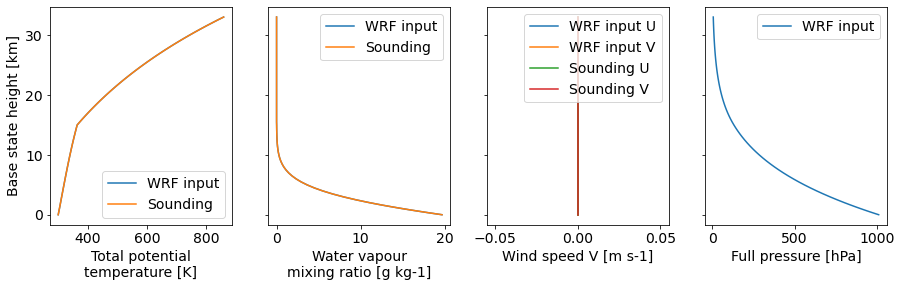

In [4]:
wp.model_setups(inputs=inputs, dataset='No shear')

The 'forced shear' case has a sheared initial atmosphere, wind relaxation to a sheared profile over all vertical levels using a three hour relaxation time, and the halo/periodic code is fixed.

Model setup for 1 km (Forced shear):
Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			301.15 K
Soil temperature at lower boundary (TMN):	301.15 K
Horizontal grid spacing (DX):			1000.0 m
Horizontal (S-N) grid spacing (DY):		1000.0 m
Horizontal (W-E) domain size:			20 mass points
Horizontal (S-N) domain size:			20 mass points
Vertical domain size:				74 mass points
Maximum geopotential height (model-top):	33174.8 m
Maximum base-state height (on mass points):	32998.8 m
Minimum, mean, maximum between-level distance:	75.0, 451.5, 505.5 m
Model-top pressure:				602.0 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		True
Relax U and V to set profiles?			True
Wind relaxation time:				10800.0 s
Physics schemes:
	Microphysi

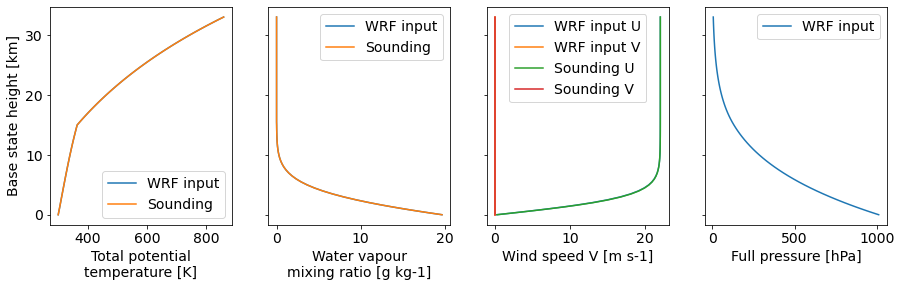

In [5]:
wp.model_setups(inputs=inputs, dataset='Forced shear')

The 'initial shear' case uses the sheared initial environment, but there is no wind relaxation.

Model setup for 1 km (Initial shear):
Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			301.15 K
Soil temperature at lower boundary (TMN):	301.15 K
Horizontal grid spacing (DX):			1000.0 m
Horizontal (S-N) grid spacing (DY):		1000.0 m
Horizontal (W-E) domain size:			20 mass points
Horizontal (S-N) domain size:			20 mass points
Vertical domain size:				74 mass points
Maximum geopotential height (model-top):	33174.8 m
Maximum base-state height (on mass points):	32998.8 m
Minimum, mean, maximum between-level distance:	75.0, 451.5, 505.5 m
Model-top pressure:				602.0 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		True
Relax U and V to set profiles?			False
Physics schemes:
	Microphysics:				8 (Thompson)
	Radiation (l

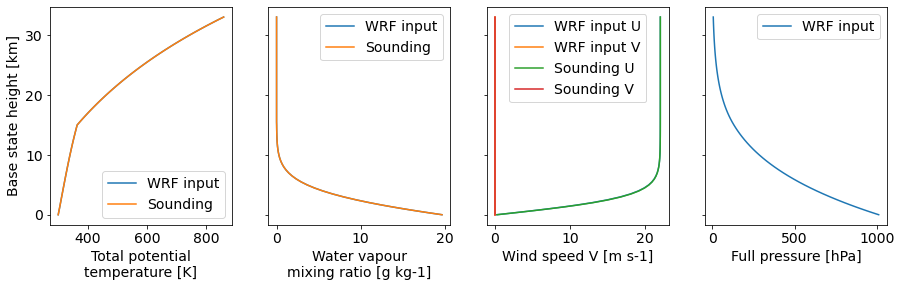

In [6]:
wp.model_setups(inputs=inputs, dataset='Initial shear')

## Evolution of wind fields

### Wind magnitude

In the initial shear case the wind relaxes fastest in the low atmosphere with high stratospheric winds until the model has been running for at least one month. After most wind has dissapated there is an inscrease in the stratospheric winds after 2.5 months.

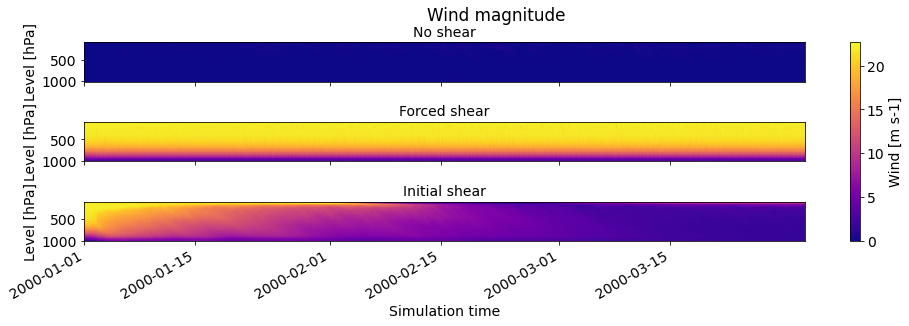

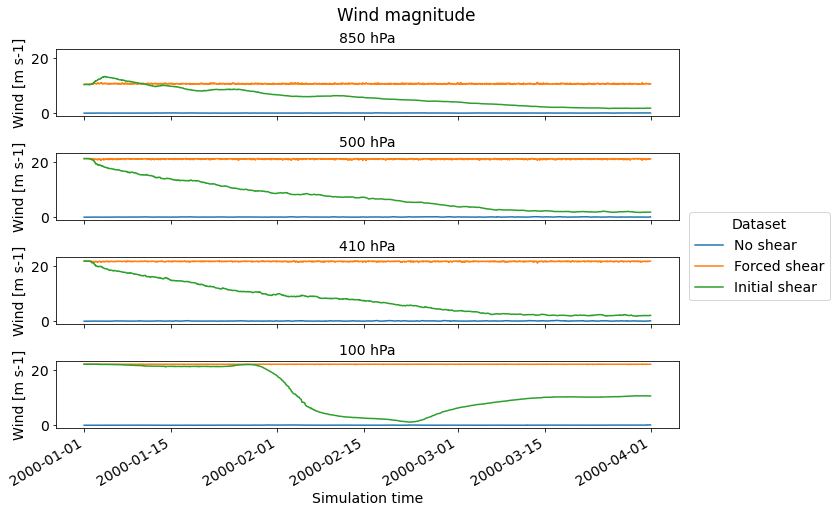

In [7]:
for res in wrfvars.keys():
    wind = wp.wind(dat=wrfvars[res])
    wp.plot_wind(wind=wind, figsize=[14,1.5*len(wind.Dataset)], title='Wind magnitude')
    wp.plot_wind_levels(wind=wind, plot_levels=plot_levels, figsize=[10,7], title='Wind magnitude')

### U (sheared) wind

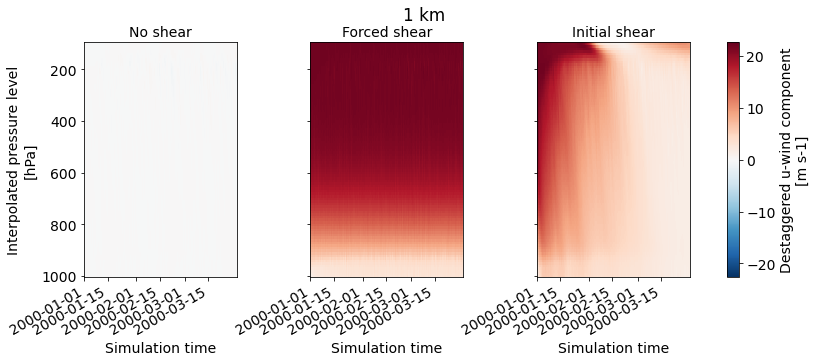

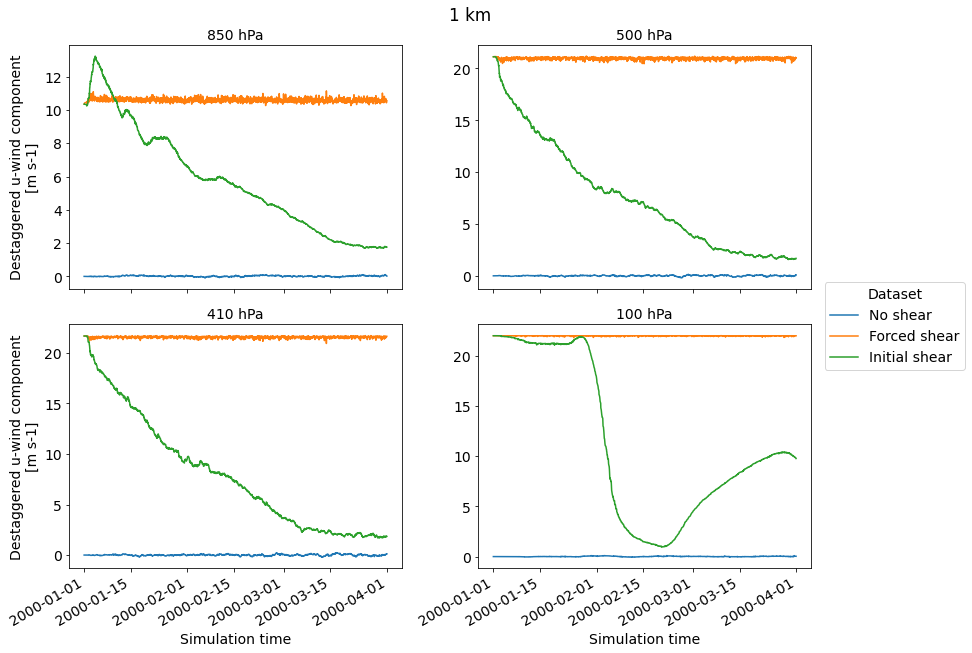

In [8]:
wp.plot_profiles_by_time(dat=wrfvars, variable='ua', figsize=(12,5))
wp.plot_levels_by_time(dat=wrfvars, variable='ua', plot_levels=plot_levels, figsize=(12,9))

### V wind

The V winds start at zero and the sheared U environment appears to set up an oscillation with a wavelength of about 1 month.

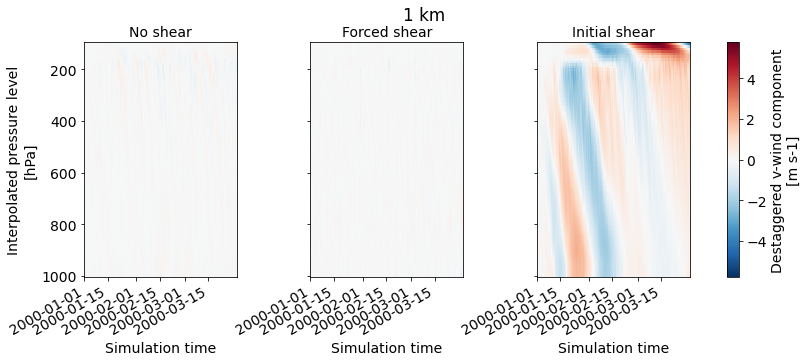

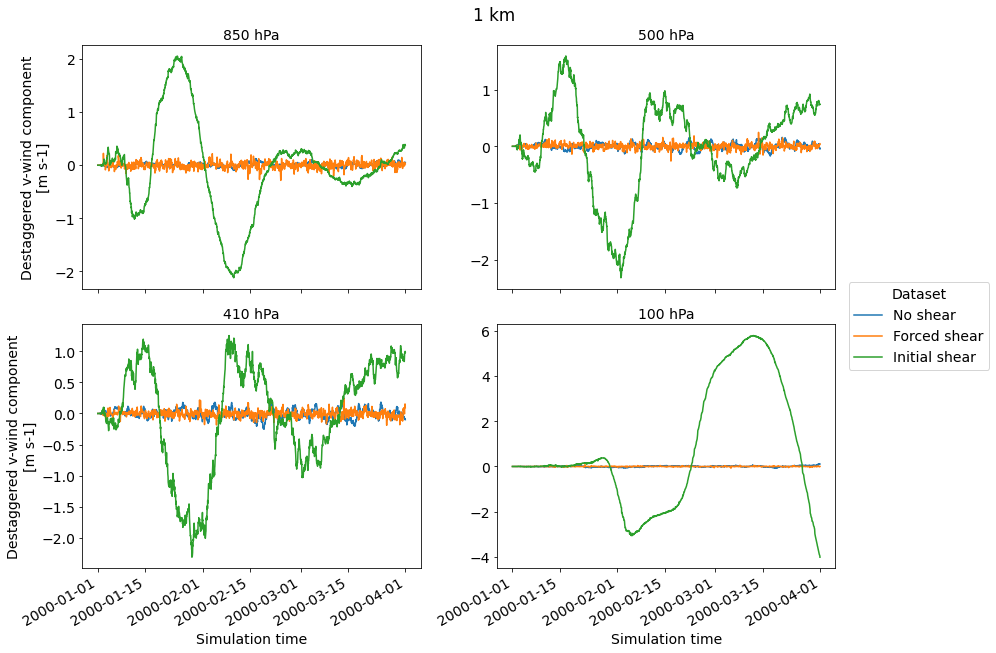

In [9]:
wp.plot_profiles_by_time(dat=wrfvars, variable='va', figsize=(12,5))
wp.plot_levels_by_time(dat=wrfvars, variable='va', plot_levels=plot_levels, figsize=(12,9))

## Relative humidity

The sheared environment has higher relative humidity in the lower atmosphere and lower relative humidity in the high atmosphere than the no shear environment. The initial shear model almost immediately matches the humidity of the no shear case in the high atmosphere (100 hPa) and relaxes to the humidity levels of the no shear model in the lower atmosphere by after about 2 months simulation time.

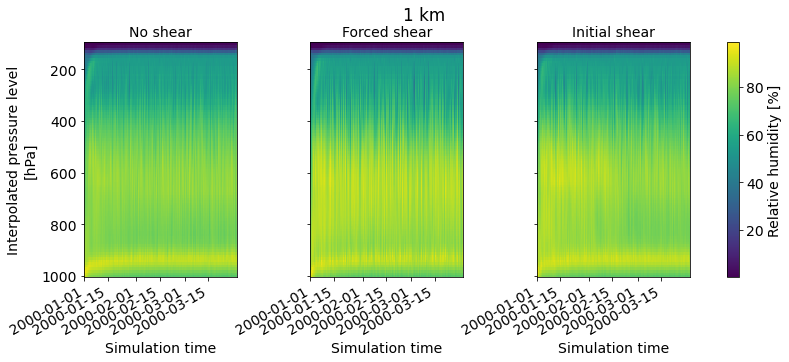

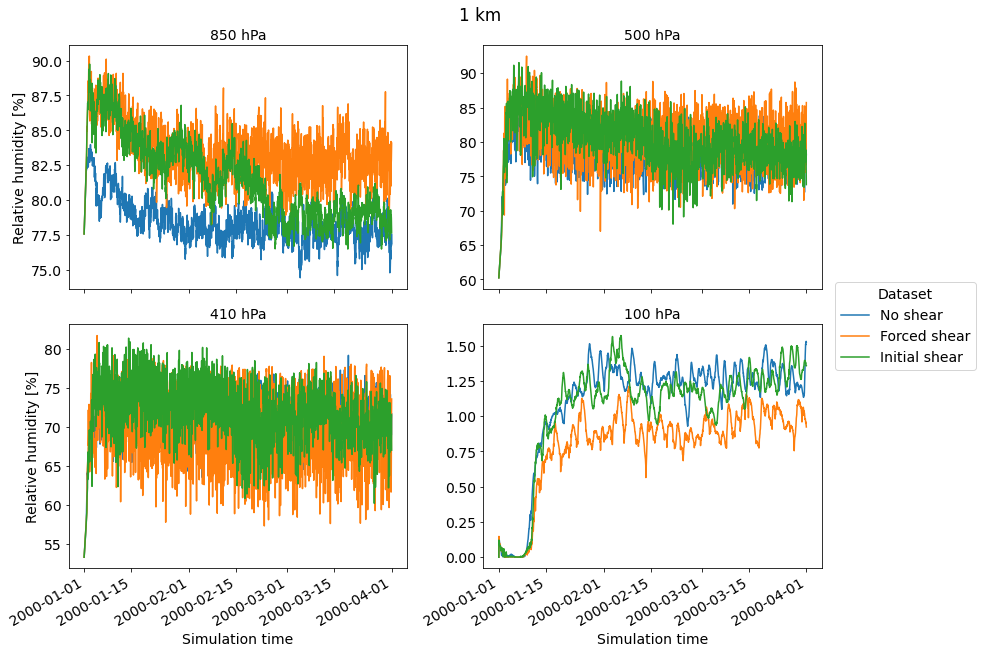

In [10]:
wp.plot_profiles_by_time(dat=wrfvars, variable='rh', figsize=(12,5))
wp.plot_levels_by_time(dat=wrfvars, variable='rh', plot_levels=plot_levels, figsize=(12,9))

## Temperature

Across the troposphere (850, 500, and 410 hPa) the forced shear case is colder than the no shear case. Meanwhile the initial shear case settles to a warmer atmosphere. The forced shear case has a warmer stratosphere (100 hPa).

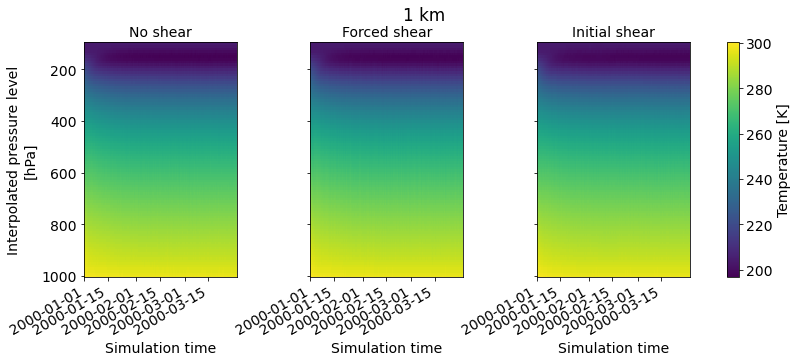

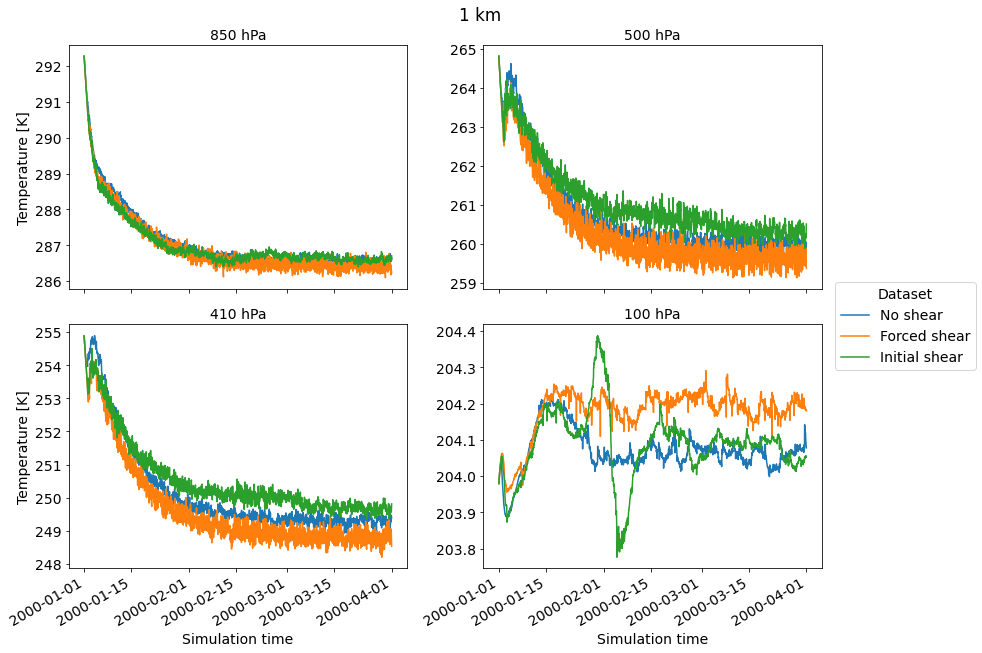

In [11]:
wp.plot_profiles_by_time(dat=wrfvars, variable='tk', figsize=(12,5))
wp.plot_levels_by_time(dat=wrfvars, variable='tk', plot_levels=plot_levels, figsize=(12,9))

## Specific humidity

The forced shear case shows a drier stratosphere (100 hPa) and moister low atmosphere (850 hPa) than the other two cases. The initial shear case takes almost the whole three month simulation time to relax to the moisture levels in the no shear case.

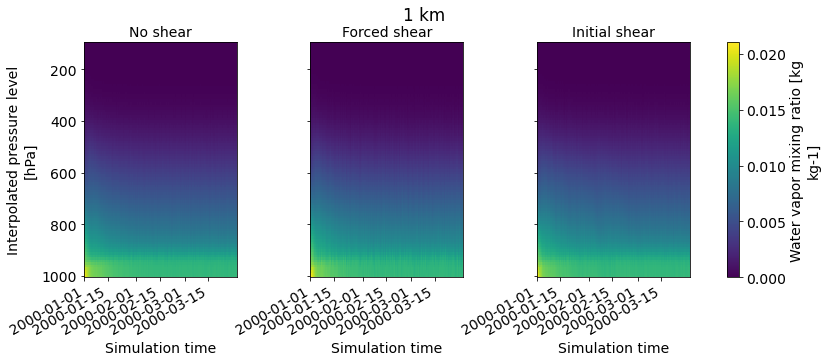

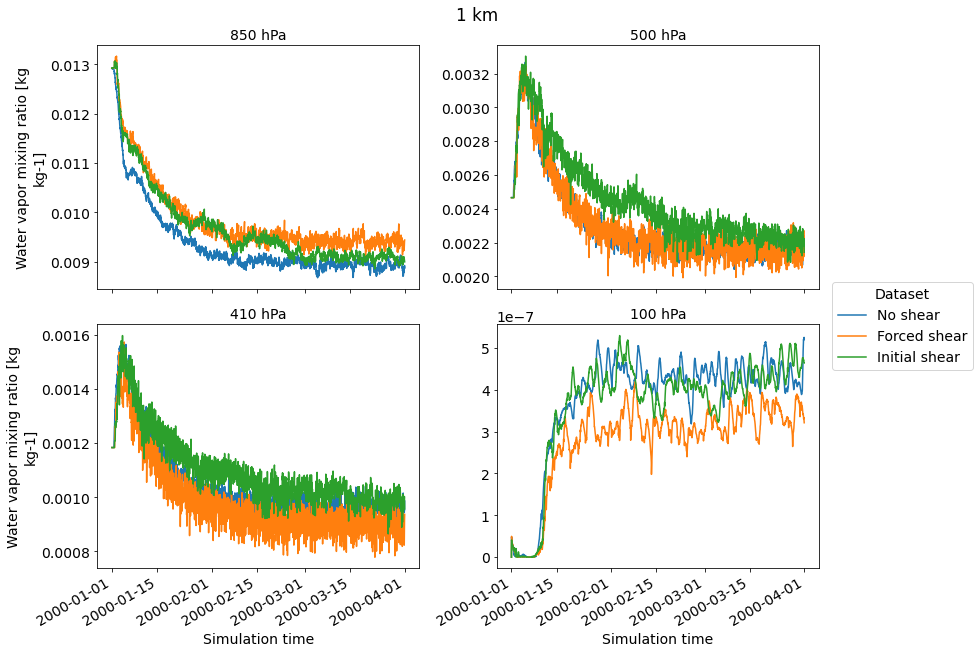

In [12]:
wp.plot_profiles_by_time(dat=wrfvars, variable='q', figsize=(12,5))
wp.plot_levels_by_time(dat=wrfvars, variable='q', plot_levels=plot_levels, figsize=(12,9))

## Precipitable water

The forced shear and no shear cases each reach RCE at about 2.5 months, while the initial shear case takes another 2 weeks to reach RCE. The RCE values of precipitable water for the initial shear case are slightly higher than the values for the no shear case. The forced shear case shows higher precipitable water values and also more variability in the precipitable water at RCE than the other two cases.

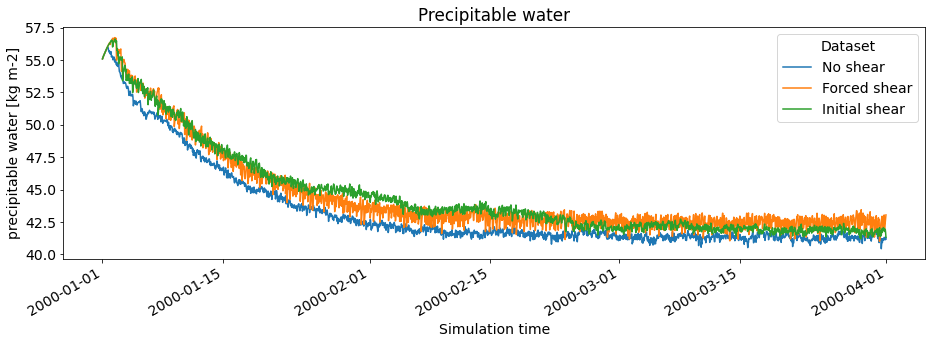

In [13]:
for res in wrfvars.keys():
    wrfvars[res].pw.plot(hue='Dataset', figsize=(13,5))
    plt.title('Precipitable water')
    plt.tight_layout()
    plt.show()

## Daily rain fields

Plots show accumulated rain over the last simulated day (2000-03-31). The advection caused by the unidirectional shear in the forced shear case is clearly visible. The initial shear case still shows some 'blurriness' indicating more advection than in the no shear case, even at the end of the run.

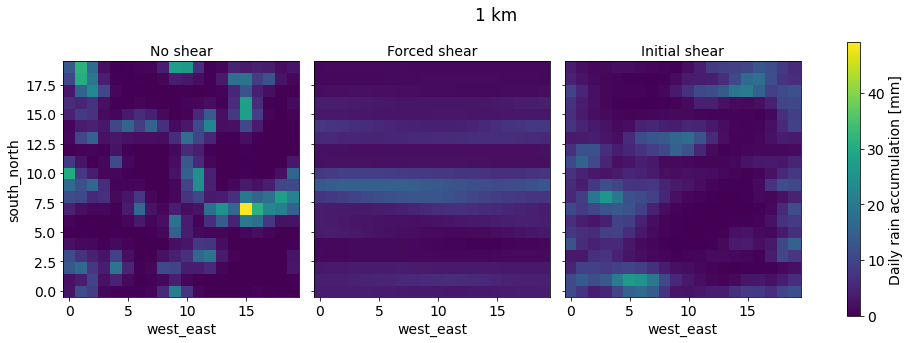

In [14]:
wp.plot_daily_rain(inputs=inputs, figsize=(14,5), ncols=3, patterns={'1 km': 'wrfout*2000-03-31*'})

## Mean profiles

Profiles are mean RCE profiles from 2000-03-01 to 2000-03-31. The profiles clearly show the shear, and also that in the initial case there are residual winds remaining at the end of the simulation and higher stratospheric winds (since there no relaxation applied). The increased mid-level humidity is visible in the profiles for the forced shear case.

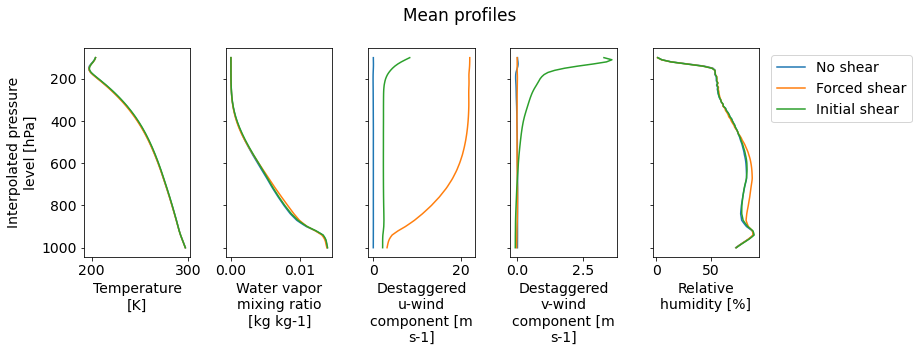

In [15]:
_ = wp.mean_profiles(dat=wrfvars['1 km'], start='2000-03-01', end='2000-04-01', figsize=[13,5], 
                     title='Mean profiles')